In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division
import os
from functools import reduce
from scipy.stats import chisquare
from pandas.tools.plotting import scatter_matrix

pd.set_option('display.max_columns', 500)

In [2]:
data_path = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop/fpl/data') 
idlist_file ='/player_idlist.csv'
gws_path = '/gws/'
players_path = '/players/'

In [3]:
idlist = pd.read_csv(data_path + '/2018-19/' + idlist_file)

cleaned_players = pd.read_csv(data_path + '/2018-19/' + 'cleaned_players.csv')
cleaned_players['fullname'] = cleaned_players['first_name'] + cleaned_players['second_name']
idlist.rename(columns={'id':'player_id'}, inplace=True)
cleaned_players.rename(columns={'id':'player_id'}, inplace=True)
element_types = pd.read_csv(data_path + '/2018-19/' + 'element_types_raw.csv')
teams = pd.read_csv(data_path + '/2018-19/' + 'teams_raw.csv')

In [4]:
def swap_columns(players):
    gws = players.gw
    elements = players.element
    
    players.drop(columns=['gw', 'element'], axis=1, inplace=True)
    players = pd.concat([gws, elements, players], axis=1)
    
    return players

In [5]:
players = pd.DataFrame()

for index, row in idlist.iterrows():
    first_name = row['first_name']
    second_name = row['second_name']
    play_id = str(row['player_id'])
    
    player_path = '/' + first_name + '_' + second_name + '_' + play_id + '/'
    
    player = pd.read_csv(data_path + '/2018-19/' + players_path + player_path + 'gw.csv')
    player['gw'] = np.arange(player.shape[0]) + 1
    players = pd.concat([players, player], axis=0)

In [6]:
players = swap_columns(players)

players.rename(columns={'element' : 'player_id',
                        'total_points' : 'points'}, inplace=True)

players['value'] = players['value'] / 10
players['roi'] = players['points'] / players['value']

players.reset_index(drop=True, inplace=True)

In [7]:
players.shape

(10393, 56)

In [8]:
players.head()

,gw,player_id,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,roi
0,1,1,0,42,0,0,0,24,0,2,31,0.0,0,0,0,0,1,0,2,0,4.7,1,47.0,0,2018-08-12T15:00:00Z,12 Aug 16:00,0,0,90,0,0,13,0,0,0,0,9,0,1,6,70767,0,0,0,2.0,0.0,0.0,3,0,0,0,5.0,True,0,0,0.6
1,2,1,0,35,0,0,0,26,0,1,25,0.0,0,0,0,0,14,0,3,0,5.3,526,53.0,0,2018-08-18T16:30:00Z,18 Aug 17:30,0,0,90,0,0,6,0,0,0,0,8,0,2,8,90038,0,0,0,2.0,3.0,0.0,3,188,6059,5871,5.0,False,0,0,0.6
2,3,1,0,24,0,0,0,17,0,0,20,0.0,0,0,0,0,21,0,1,0,2.8,1053,27.8,0,2018-08-25T14:00:00Z,25 Aug 15:00,0,0,90,0,0,19,0,0,0,0,10,0,3,4,107301,0,0,0,1.0,3.0,0.0,3,8540,19550,11010,5.0,True,0,0,0.6
3,4,1,0,38,0,0,0,8,0,0,24,0.0,0,0,0,2,33,0,2,0,0.2,1584,2.4,0,2018-09-02T12:30:00Z,02 Sep 13:30,0,0,90,0,0,5,0,0,0,0,8,0,4,1,123566,0,0,0,3.0,2.0,0.0,1,9582,19332,9750,5.0,False,0,0,0.2
4,5,1,0,33,0,0,0,13,0,2,23,0.0,0,0,0,0,46,0,1,0,1.4,2121,14.2,0,2018-09-15T14:00:00Z,15 Sep 15:00,0,0,90,0,0,15,0,0,0,0,13,0,5,1,123310,0,0,0,2.0,1.0,0.0,2,-3297,8837,12134,5.0,False,0,0,0.4


In [9]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10393 entries, 0 to 10392
Data columns (total 56 columns):
gw                                 10393 non-null int64
player_id                          10393 non-null int64
assists                            10393 non-null int64
attempted_passes                   10393 non-null int64
big_chances_created                10393 non-null int64
big_chances_missed                 10393 non-null int64
bonus                              10393 non-null int64
bps                                10393 non-null int64
clean_sheets                       10393 non-null int64
clearances_blocks_interceptions    10393 non-null int64
completed_passes                   10393 non-null int64
creativity                         10393 non-null float64
dribbles                           10393 non-null int64
ea_index                           10393 non-null int64
errors_leading_to_goal             10393 non-null int64
errors_leading_to_goal_attempt     10393 non-null

In [10]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                '%d' % int(height),
                ha='center', va='bottom')

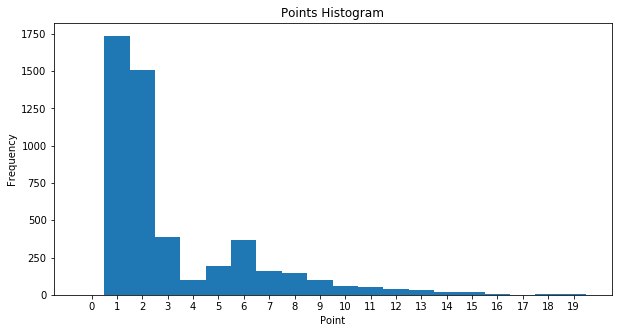

In [11]:
scored_players = players.loc[players['points'] > 0, :]

max_point = scored_players['points'].max()
bins = bins=np.arange(0, max_point, 1)

plt.figure(figsize=(10, 5))
plt.hist(scored_players['points'], bins=bins, align='left')
plt.xticks(bins[:-1])
plt.title("Points Histogram")
plt.ylabel("Frequency")
plt.xlabel("Point")
plt.show()

<span style='color:green'>Most of the players will have points around 1-2 points per week</span>

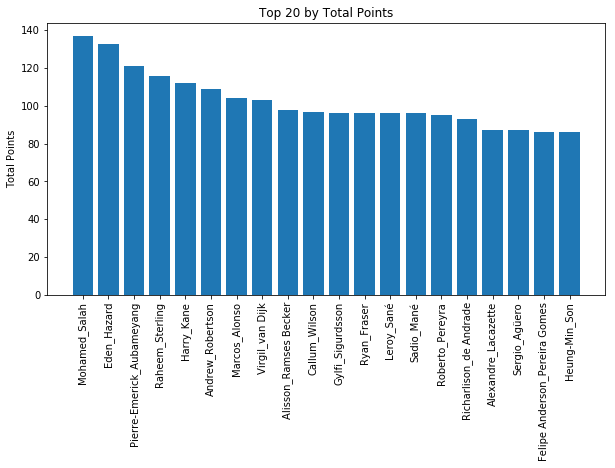

In [12]:
top_10 = players.groupby(players.player_id, as_index=False)['points'].sum().sort_values('points', ascending =False)[:20]

top_10 = pd.merge(top_10, idlist, left_on='player_id', right_on='player_id', how='inner')
top_10['full_name'] = top_10['first_name'] + '_' + top_10['second_name']

plt.figure(figsize=(10, 5))
plt.bar(top_10['full_name'], top_10['points'])
plt.xticks(rotation=90)
plt.ylabel('Total Points')
plt.title('Top 20 by Total Points')
plt.show()

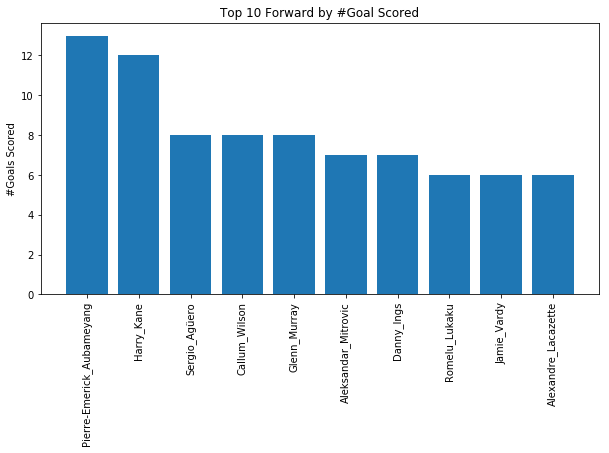

In [13]:
df = players.merge(cleaned_players.loc[:, ['player_id', 'element_type']], on='player_id')
top_scorer = df.loc[df['element_type'] == 4,:].groupby('player_id', as_index=False)['goals_scored'].sum().sort_values('goals_scored', ascending=False)[:10]
top_scorer = top_scorer.merge(cleaned_players.loc[:, ['player_id', 'first_name', 'second_name']])
top_scorer['full_name'] = top_scorer['first_name'] + '_' + top_scorer['second_name']

plt.figure(figsize=(10, 5))
plt.bar(top_scorer['full_name'], top_scorer['goals_scored'])
plt.ylabel('#Goals Scored')
plt.xticks(rotation=90)
plt.title('Top 10 Forward by #Goal Scored')
plt.show()


<span style='color:green'>Even Lukaku can made it on top 10,  C'mon
   he's not that bad</span>

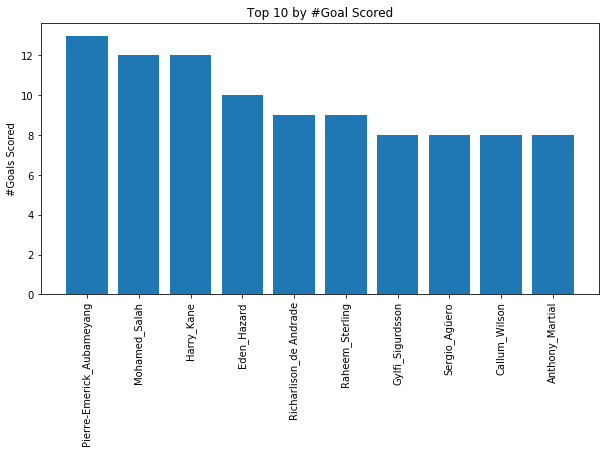

In [14]:
df = players.groupby('player_id', as_index=False)['goals_scored'].sum().sort_values('goals_scored', ascending=False)[:10]
df = pd.merge(df, cleaned_players.loc[:, ['player_id', 'first_name', 'second_name']], on='player_id', how='inner')
df['full_name'] = df['first_name'] + '_' + df['second_name']

plt.figure(figsize=(10, 5))
plt.bar(df['full_name'], df['goals_scored'])
plt.ylabel('#Goals Scored')
plt.xticks(rotation=90)
plt.title('Top 10 by #Goal Scored')
plt.show()


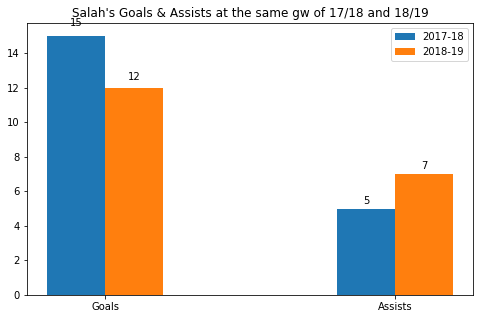

In [15]:
salah_prev = pd.read_csv(data_path + '/2017-18/' + 'players/' + 'Mohamed_Salah/gw.csv')
salah_now = players.loc[players['player_id'] == 253, :]
salah_prev_until_this_gw = salah_prev.loc[:salah_now.shape[0]-1, :]

now_goals = salah_now['goals_scored'].sum() 
now_assists =  salah_now['assists'].sum()
prev_goals = salah_prev_until_this_gw['goals_scored'].sum() 
prev_assists = salah_prev_until_this_gw['assists'].sum()

n = 2 
ind = np.arange(n)
width = 0.20

fig, ax = plt.subplots()
fig.set_size_inches(h=5, w=8)
rect_prev = ax.bar(ind, [prev_goals, prev_assists], width, label='2017-18')
rect_now = ax.bar(ind+width, [now_goals, now_assists], width, label='2018-19')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(("Goals", "Assists"))
ax.set_title("Salah's Goals & Assists at the same gw of 17/18 and 18/19")
plt.legend()

autolabel(rect_prev)
autolabel(rect_now)
plt.show()

<span style='color:green'>Mo Salah is absolutly not a ONE YEAR WONDER</span>

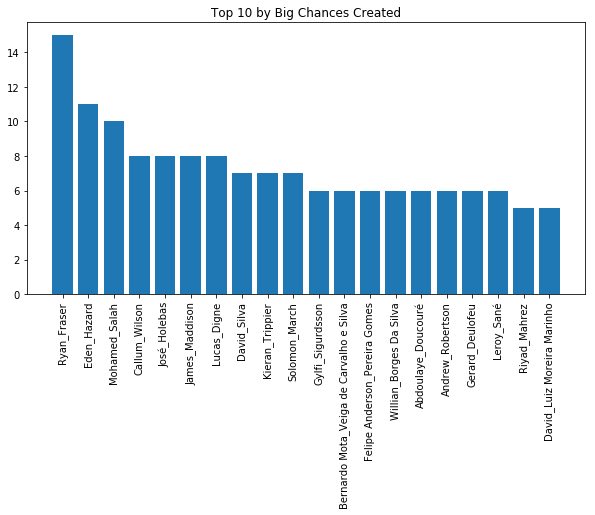

In [16]:
top_10 = players.groupby('player_id', as_index=False)['big_chances_created'].sum().sort_values('big_chances_created', ascending=False)[:20]
top_10 = top_10.merge(cleaned_players.loc[:, ('player_id', 'first_name', 'second_name')], on='player_id')
top_10['fullname'] = top_10['first_name'] + '_' + top_10['second_name']

plt.figure(figsize=(10, 5))
plt.bar(top_10['fullname'], top_10['big_chances_created'])
plt.xticks(rotation=90)
plt.title("Top 10 by Big Chances Created")
plt.show()


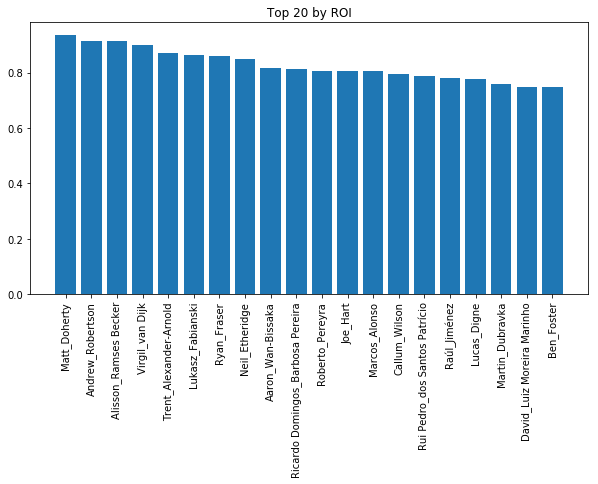

In [17]:
top_by_roi = players.groupby('player_id', as_index=False)['roi'].mean()
top_by_roi = top_by_roi.merge(cleaned_players.loc[:,('player_id', 'team', 'element_type', 'first_name', 'second_name')], on='player_id')
top_by_roi = top_by_roi.merge(teams.loc[:, ('id', 'name')], left_on='team', right_on='id')
top_by_roi.drop(columns=['team','id'], inplace=True)
top_by_roi['fullname'] = top_by_roi['first_name'] + '_' + top_by_roi['second_name']
top_by_roi.drop(columns=['first_name', 'second_name'], inplace=True)
top_by_roi.rename(columns={'name': 'team'}, inplace=True)

top_by_roi = pd.merge(top_by_roi, element_types.loc[:, ('id', 'singular_name_short')], left_on='element_type', right_on='id', how='inner')
top_by_roi.drop(columns=['id', 'element_type'], inplace=True)
top_by_roi.rename(columns={'singular_name_short':'position'}, inplace=True)

top_by_roi.sort_values('roi', ascending=False, inplace=True)

top_20_roi = top_by_roi[:20]

plt.figure(figsize=(10, 5))
plt.bar(top_20_roi['fullname'], top_20_roi['roi'])
plt.xticks(rotation=90)
plt.title('Top 20 by ROI')
plt.show()


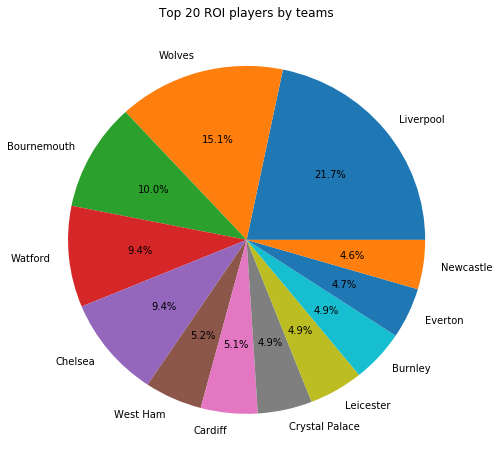

In [18]:
top_team_roi = top_20_roi.groupby('team', as_index=False)['roi'].sum().sort_values('roi', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(top_team_roi['roi'], labels=top_team_roi['team'], autopct='%1.1f%%')
plt.title("Top 20 ROI players by teams")
plt.show()

<span style='color:green'>You should invest more in Wolves, Bournewmouth and Watford</span>

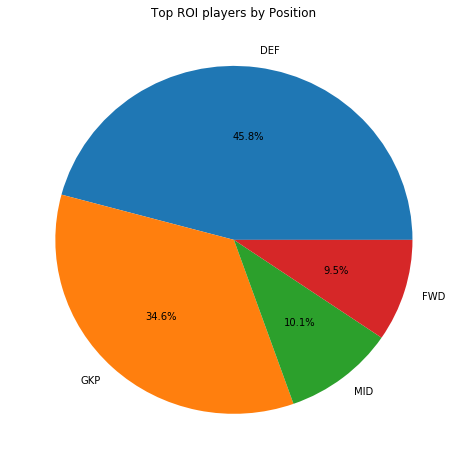

In [19]:
df = top_20_roi.groupby('position', as_index=False)['roi'].sum().sort_values('roi', ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(df['roi'], labels=df['position'], autopct='%1.1f%%')
plt.title('Top ROI players by Position')
plt.show()


<span style='color:green'>You should invest more in DEF and GK</span>

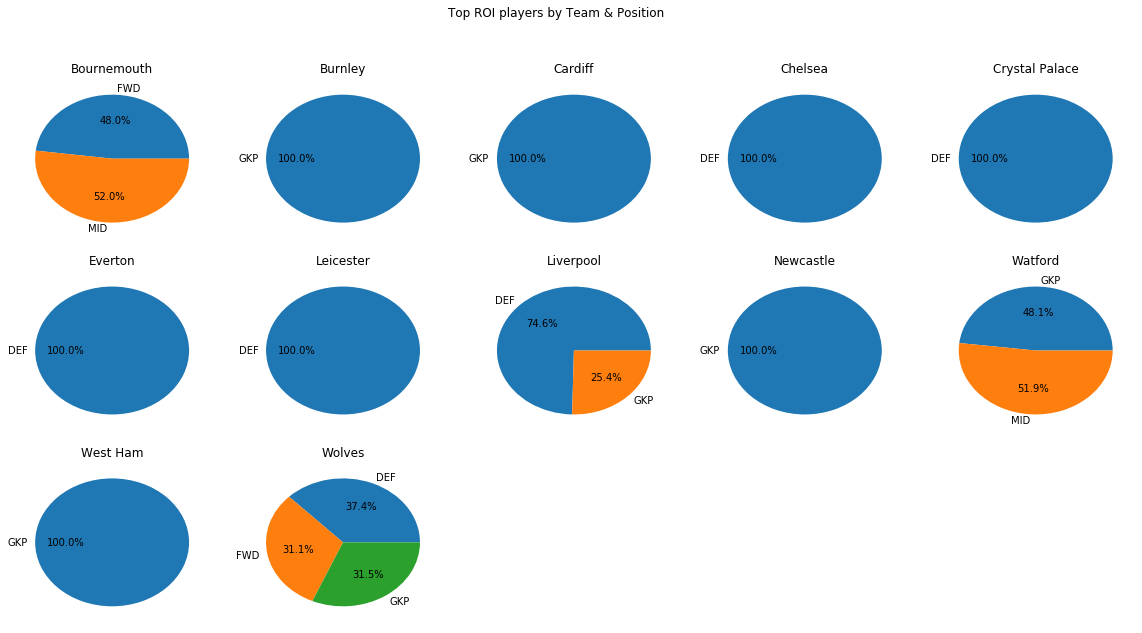

In [20]:
top_roi_teams = list(top_20_roi.groupby('team').groups.keys())

n_col = 5
n_row = int(np.ceil(len(top_roi_teams) / n_col))

plt.figure(figsize=(20, 10))
for index, team in enumerate(top_roi_teams):
    top_20_roi_by_team = top_20_roi.loc[top_20_roi['team'] == team, :]
    top_20_roi_by_team_by_position = top_20_roi_by_team.groupby('position', as_index=False)['roi'].sum()
    top_20_roi_by_team_by_position['roi'] = top_20_roi_by_team_by_position['roi'] *100
    
    plt.subplot(n_row, n_col, index+1)
    plt.pie(top_20_roi_by_team_by_position['roi'], labels=top_20_roi_by_team_by_position['position'], autopct='%1.1f%%')
    plt.gca().set_title(team)
        
plt.gcf().suptitle("Top ROI players by Team & Position")
plt.show()


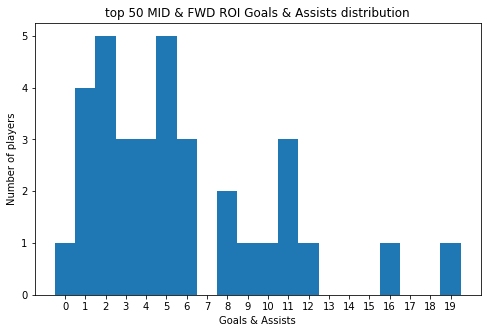

In [21]:
df = top_by_roi[:50].copy()
df = df.loc[df['position'] != 'GKP', :]
for player_id in df['player_id']:
    player = players.loc[players['player_id'] == player_id,:]
    goals_assists = player['goals_scored'].sum() + player['assists'].sum()
    df.loc[df['player_id'] == player_id,'goals_assists'] = goals_assists
    
bins = np.arange(df['goals_assists'].min(), df['goals_assists'].max() + 2, 1)

plt.figure(figsize=(8, 5))
plt.hist(df['goals_assists'], bins=bins, align='left')
plt.xticks(bins[:-1])
plt.title("top 50 MID & FWD ROI Goals & Assists distribution")
plt.xlabel("Goals & Assists")
plt.ylabel("Number of players")
plt.show()

<span style='color:green'>It seems like there are someone who neither score nor assist, how can he made on the top ROI list? </span>

In [22]:
df.loc[df['goals_assists'] == 0, :]

,player_id,roi,team,fullname,position,goals_assists
129,143,0.657787,Crystal Palace,Mamadou_Sakho,DEF,0.0


<span style='color:green'>The guy is Mamadou Sakho, former Liverpool player</span><br>
<span style='color:green'>Let's investigate on his stats</span>

In [23]:
sakho = players.loc[players['player_id'] == 143, :]
print("Sakho Performances after {0} GWs ".format(sakho.shape[0]))
print("Goals: ", sakho['goals_scored'].sum())
print("Assists: ", sakho['assists'].sum())
print("Clean Sheet: ", sakho['clean_sheets'].sum())
print("Cost mean: ", sakho['value'].mean())
print("Total Points: ", sakho['points'].sum())

Sakho Performances after 19 GWs 
Goals:  0
Assists:  0
Clean Sheet:  7
Cost mean:  4.968421052631581
Total Points:  62


In [24]:
def consistency(events):
    return sum(events != 0)

def chisquare_score(observations, expectaions=None):
    return chisquare(observations, expectaions)[0]

base_aggregations = [np.sum, np.mean]

forwardids = list(cleaned_players.loc[cleaned_players['element_type'] == 4, 'player_id'])
forwards = players.loc[[ player_id in forwardids for player_id in players['player_id']], :]

fw_stats_by_player_id = forwards.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'goals_scored': base_aggregations + [consistency, chisquare_score],
    'assists': base_aggregations + [consistency, chisquare_score],
    'roi' : np.mean,
    'value' : np.mean,
    'target_missed' : np.sum,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
    'offside' : base_aggregations,
    'penalties_missed' : np.sum
})

#plt.figure(figsize=(10, 8))

x = fw_stats_by_player_id['goals_scored']['consistency'] + fw_stats_by_player_id['assists']['consistency']
y = fw_stats_by_player_id['goals_scored']['mean'] +  fw_stats_by_player_id['assists']['mean'] 
#colors = fw_stats_by_player_id['roi']['mean']
#sizes = fw_stats_by_player_id['points']['sum']

#plt.scatter(x, y, c=colors, cmap='plasma', s=sizes * 10, alpha=0.6)
#cbar = plt.colorbar()
#plt.xlabel("Goals & Assists Consistensy")
#plt.ylabel("Goals & Assists Mean")
#cbar.ax.set_ylabel("price")
#plt.title("Forwards Stats")
#plt.grid(True)
#for index, row in fw_stats_by_player_id.iterrows():
#    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
#plt.show()

/Users/80151/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


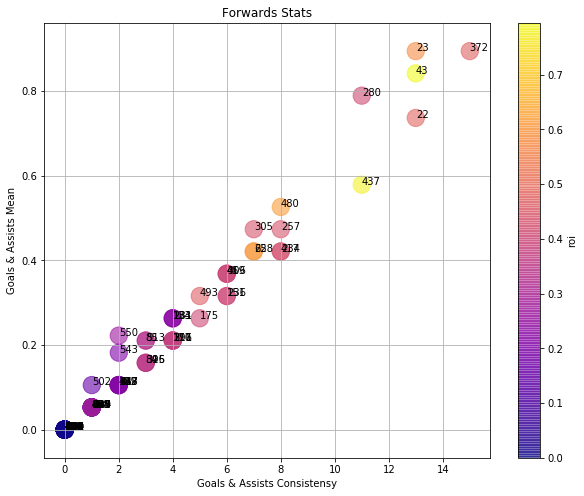

In [25]:
colors = fw_stats_by_player_id['roi']['mean']

plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=colors, cmap='plasma', s=300, alpha=0.6)
cbar = plt.colorbar()
cbar.ax.set_ylabel("roi")

plt.xlabel("Goals & Assists Consistensy")
plt.ylabel("Goals & Assists Mean")
plt.title("Forwards Stats")
plt.grid(True)
for index, row in fw_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
plt.show()

### Top Right cluster

In [26]:
#top right cluster
top_right_bools = (fw_stats_by_player_id['goals_scored']['consistency'] + fw_stats_by_player_id['assists']['consistency']) > 10
ids = fw_stats_by_player_id.loc[top_right_bools, :]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names


,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
20,22,Alexandre,Lacazette,1,3,4,6,8,87,1193,15,256.6,429.2,541.0,11,284,122.2,2,0,1,8.3,95,AlexandreLacazette
21,23,Pierre-Emerick,Aubameyang,1,3,4,13,4,121,1480,21,259.8,573.4,706.0,21,449,153.8,4,0,0,36.7,115,Pierre-EmerickAubameyang
48,43,Callum,Wilson,2,91,4,8,8,97,1509,25,284.7,415.4,675.0,11,302,137.3,5,0,3,32.8,68,CallumWilson
357,280,Sergio,Agüero,13,43,4,8,7,87,1085,8,298.1,406.8,779.0,9,324,148.3,7,0,3,22.2,112,SergioAgüero
469,372,Harry,Kane,17,6,4,12,5,112,1613,18,258.7,585.2,860.0,15,410,170.4,7,0,3,31.2,125,HarryKane
556,437,Raúl,Jiménez,20,39,4,5,6,85,1538,20,317.8,347.4,752.0,11,263,141.3,6,0,0,20.3,63,RaúlJiménez


### So, It seems like Aubameyang, Wilson and Jiménez are the best choices for me

### Middle cluster

In [27]:
#Middle cluster
goals_assists_consis = fw_stats_by_player_id['goals_scored']['consistency'] + fw_stats_by_player_id['assists']['consistency']
middle_bools = (goals_assists_consis == 7) | (goals_assists_consis == 8)
ids = fw_stats_by_player_id.loc[middle_bools, :]['player_id']
names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names


,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
69,62,Glenn,Murray,3,36,4,8,0,71,1211,18,109.1,287.4,386.0,11,208,77.6,2,0,3,3.4,65,GlennMurray
243,480,Aleksandar,Mitrovic,9,54,4,7,3,78,1660,42,250.0,394.6,888.0,8,239,153.5,1,0,4,17.6,67,AleksandarMitrovic
300,234,Jamie,Vardy,11,13,4,6,2,66,1108,13,133.6,292.6,495.0,13,200,92.0,6,1,1,3.5,88,JamieVardy
329,257,Roberto,Firmino,12,14,4,4,5,77,1424,3,358.3,325.6,602.0,10,301,128.1,14,0,0,15.7,92,RobertoFirmino
383,305,Marcus,Rashford,14,1,4,4,5,56,1011,16,263.5,309.0,380.0,3,189,95.0,2,1,2,17.8,72,MarcusRashford
417,258,Danny,Ings,16,20,4,7,1,65,954,17,185.1,336.2,549.0,11,237,107.0,3,0,1,8.7,56,DannyIngs
525,417,Marko,Arnautovic,19,21,4,5,3,59,1008,18,276.3,290.8,523.0,9,218,108.3,1,0,3,6.5,69,MarkoArnautovic


### The False 9s

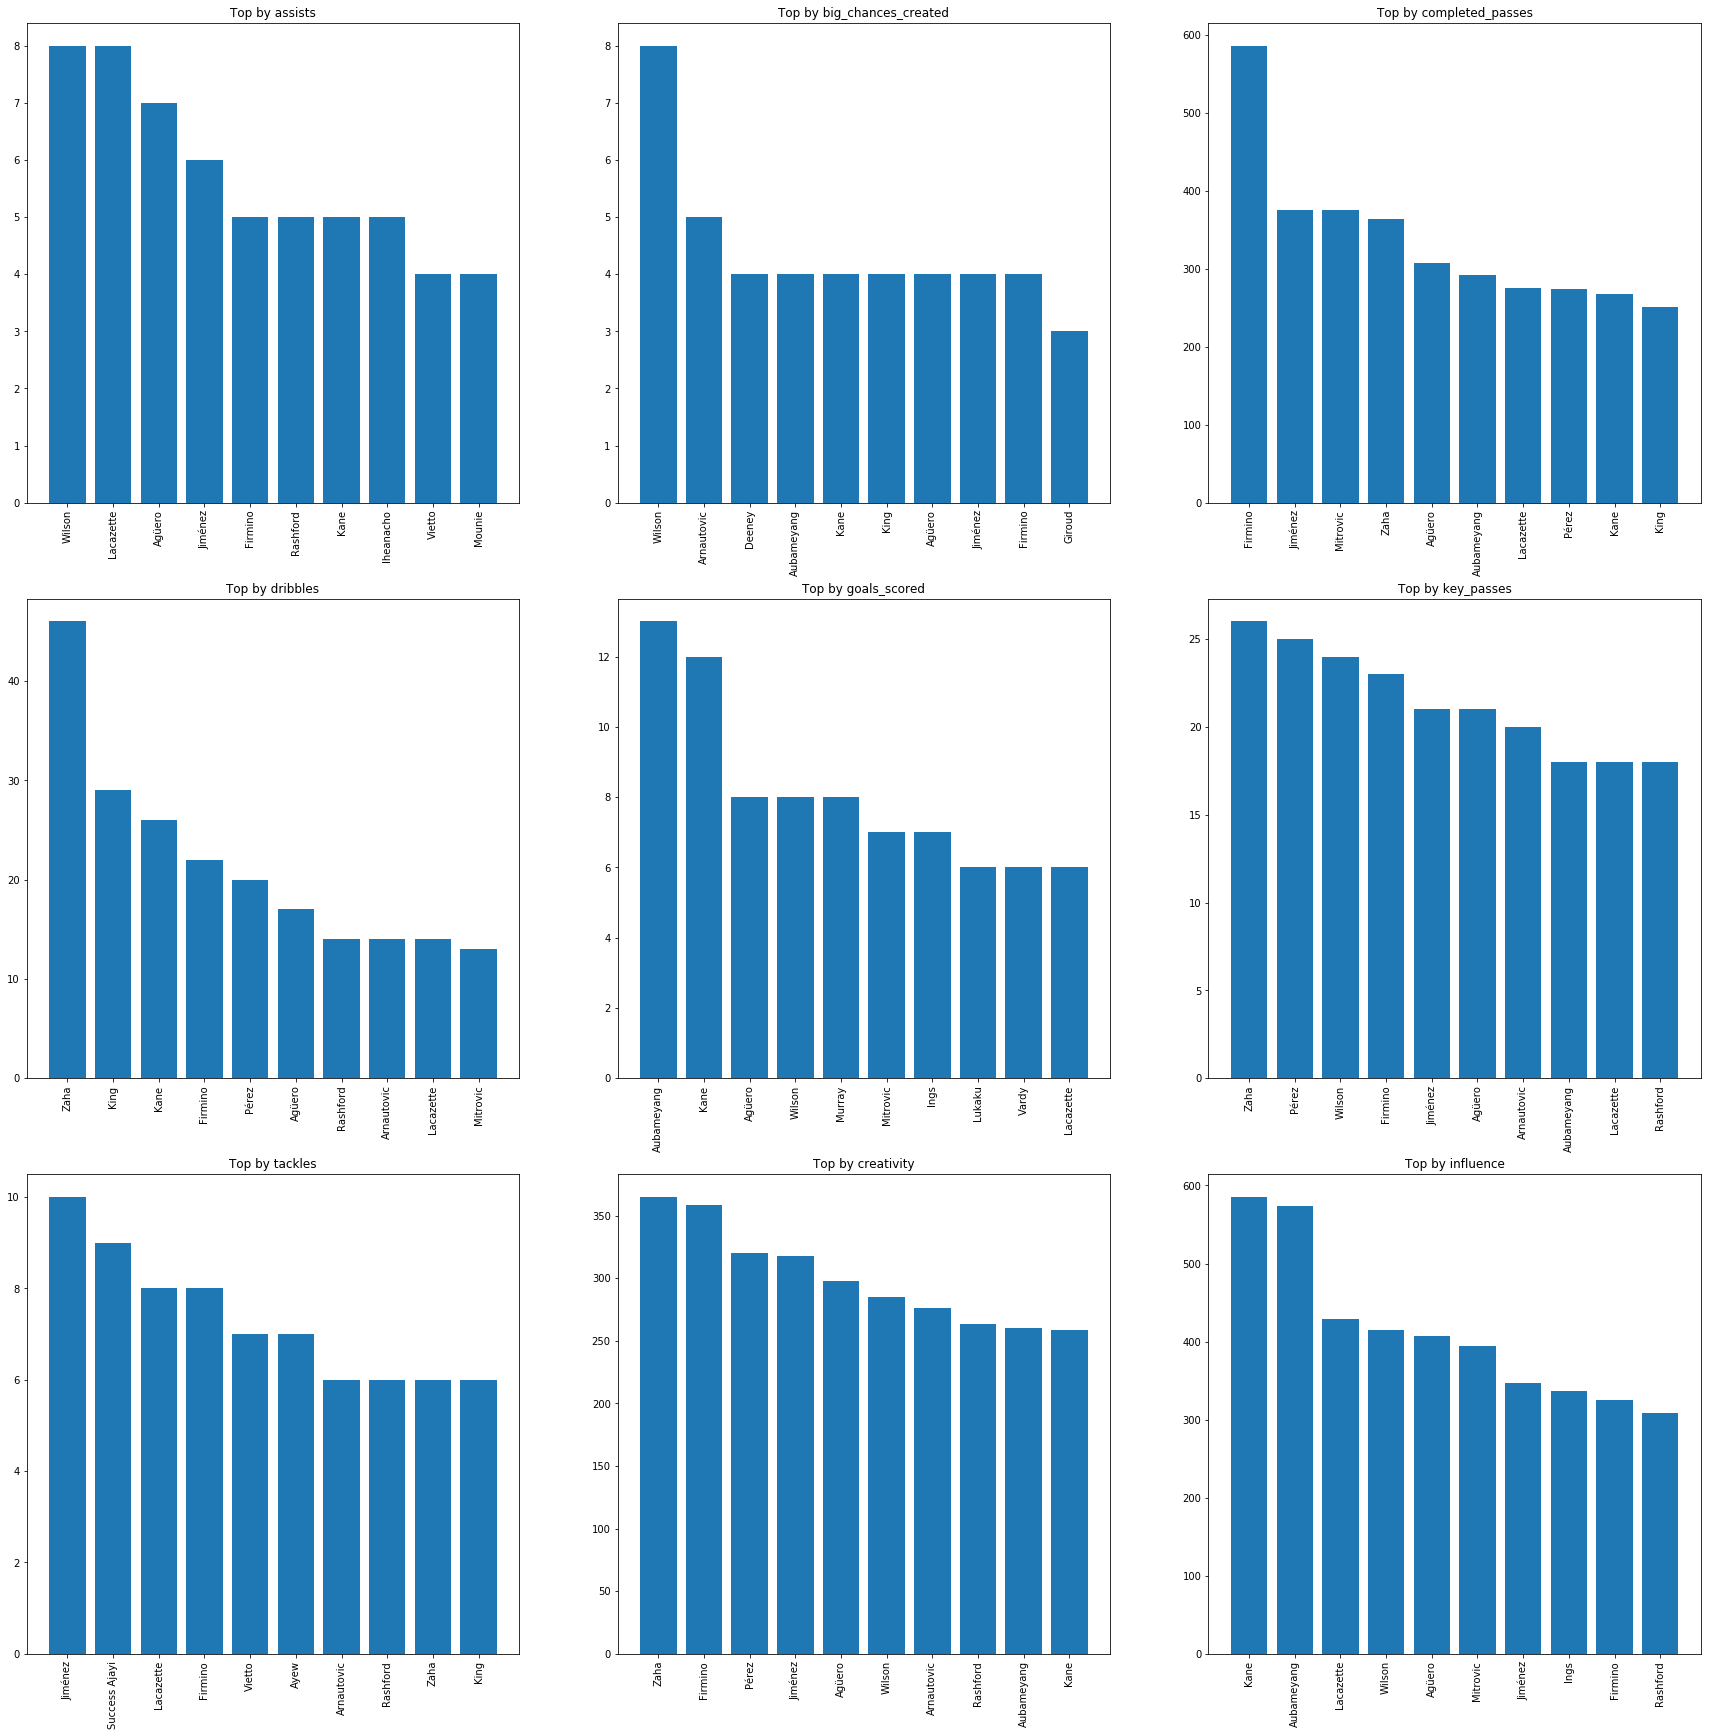

In [28]:
false_9_stats = forwards.groupby('player_id', as_index=False).agg({
    'assists': np.sum,
    'big_chances_created' : np.sum,
    'completed_passes' : np.sum,
    'dribbles' : np.sum,
    'goals_scored' : np.sum,
    'key_passes' : np.sum,
    'tackles' : np.sum,
    'creativity' : np.sum,
    'influence' : np.sum
})
false_9_stats = false_9_stats.merge(cleaned_players.loc[:, ['player_id','second_name']], on='player_id')

plt.figure(figsize=(30, 30))
for index, column in enumerate(false_9_stats.columns):
    if(column != 'player_id' and column != 'second_name'):
        top = false_9_stats.loc[:, ['second_name', column]].sort_values(column, ascending=False)[:10]
        plt.subplot(3, 3, index)
        plt.bar(top['second_name'], top[column])
        plt.xticks(rotation=90)
        plt.title('Top by {0}'.format(column))

plt.show()
        

/Users/80151/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


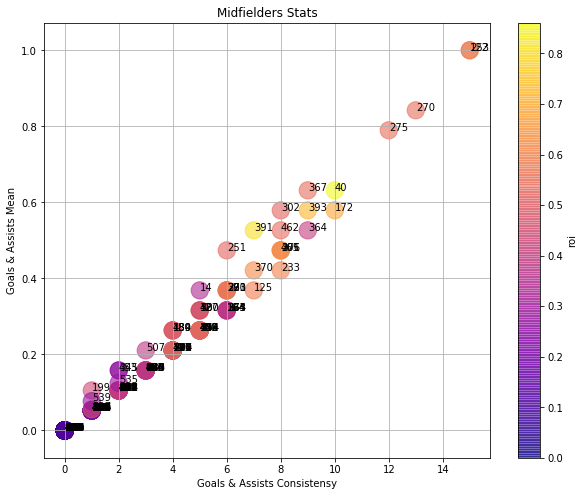

In [29]:
midfielderids = list(cleaned_players.loc[cleaned_players['element_type'] == 3, 'player_id'])
midfielders = players.loc[[ player_id in midfielderids for player_id in players['player_id']], :]

mid_stats_by_player_id = midfielders.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'goals_scored': base_aggregations + [consistency, chisquare_score],
    'assists': base_aggregations + [consistency, chisquare_score],
    'roi' : np.mean,
    'value' : np.mean,
    'target_missed' : np.sum,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
    'penalties_missed' : np.sum
})

plt.figure(figsize=(10, 8))

x = mid_stats_by_player_id['goals_scored']['consistency'] + mid_stats_by_player_id['assists']['consistency']
y = mid_stats_by_player_id['goals_scored']['mean'] +  mid_stats_by_player_id['assists']['mean'] 
colors = mid_stats_by_player_id['roi']['mean']
sizes = mid_stats_by_player_id['bonus']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=300, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Goals & Assists Consistensy")
plt.ylabel("Goals & Assists Mean")
cbar.ax.set_ylabel("roi")
plt.grid(True)
plt.title("Midfielders Stats")
for index, row in mid_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
plt.show()

### Top Right cluster

In [30]:
top_right_bools = (mid_stats_by_player_id['goals_scored']['consistency'] + mid_stats_by_player_id['assists']['consistency']) >= 12 
ids = mid_stats_by_player_id.loc[top_right_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names


,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
148,122,Eden,Hazard,6,8,3,10,9,133,1403,13,700.0,641.0,711.0,19,467,205.5,6,0,2,36.2,110,EdenHazard
325,253,Mohamed,Salah,12,14,3,12,7,137,1575,6,569.6,669.4,1098.0,7,404,234.0,12,0,0,39.7,132,MohamedSalah
347,270,Raheem,Sterling,13,43,3,9,7,116,1293,12,486.5,558.2,785.0,13,392,183.2,7,0,1,15.8,114,RaheemSterling
352,275,Leroy,Sané,13,43,3,6,9,96,1069,10,448.6,449.0,685.0,7,326,158.4,5,0,1,14.5,96,LeroySané


### Middle cluster

In [31]:
goals_assists_consis = mid_stats_by_player_id['goals_scored']['consistency'] + mid_stats_by_player_id['assists']['consistency']
middle_bools = (goals_assists_consis >= 8) & (goals_assists_consis <= 10)
ids = mid_stats_by_player_id.loc[middle_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names


,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
45,40,Ryan,Fraser,2,91,3,4,8,96,1564,31,663.2,482.6,311.0,12,395,145.9,4,0,1,25.2,62,RyanFraser
210,172,Gylfi,Sigurdsson,8,11,3,8,3,96,1593,26,583.8,520.6,518.0,12,346,162.2,5,0,3,6.3,73,GylfiSigurdsson
216,393,Richarlison,de Andrade,8,11,3,9,2,93,1382,24,163.1,436.0,645.0,11,242,123.9,4,1,2,30.8,70,Richarlisonde Andrade
299,233,James,Maddison,11,13,3,5,3,76,1384,21,623.0,411.4,329.0,7,330,136.1,5,1,1,5.2,68,JamesMaddison
331,462,Xherdan,Shaqiri,12,14,3,6,4,72,712,3,253.3,317.2,260.0,4,223,83.1,6,0,1,3.5,71,XherdanShaqiri
353,276,Bernardo Mota,Veiga de Carvalho e Silva,13,43,3,5,4,84,1488,14,524.6,433.0,492.0,9,351,145.1,6,0,2,6.6,75,Bernardo MotaVeiga de Carvalho e Silva
379,301,Anthony,Martial,14,1,3,8,1,77,880,16,283.2,359.0,387.0,11,245,102.9,1,0,1,10.6,74,AnthonyMartial
380,302,Paul,Pogba,14,1,3,5,6,79,1314,20,350.6,506.2,553.0,8,280,141.3,3,0,2,15.8,80,PaulPogba
461,364,Christian,Eriksen,17,6,3,3,7,71,1060,16,412.6,364.4,213.0,6,296,99.2,3,0,1,5.9,93,ChristianEriksen
464,367,Heung-Min,Son,17,6,3,7,5,86,822,7,192.7,367.0,446.0,8,269,100.4,6,0,1,13.5,87,Heung-MinSon


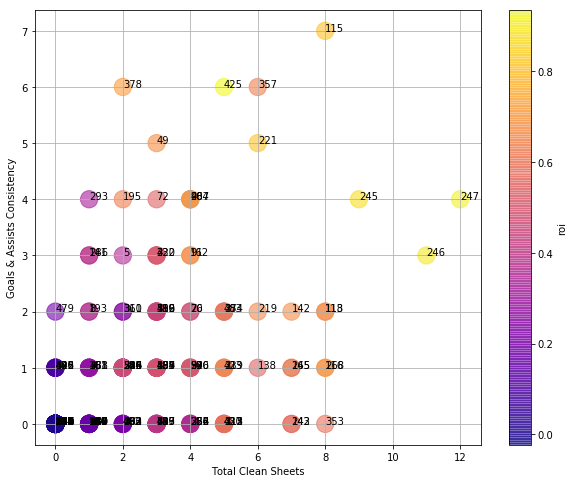

In [32]:
defenderids = list(cleaned_players.loc[cleaned_players['element_type'] == 2, 'player_id'])
defenders = players.loc[[ player_id in defenderids for player_id in players['player_id']], :]

def_stats_by_player_id = defenders.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'clean_sheets' : np.sum,
    'goals_scored': base_aggregations + [consistency],
    'assists': base_aggregations + [consistency],
    'roi' : np.mean,
    'value' : np.mean,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
})

plt.figure(figsize=(10, 8))

x = def_stats_by_player_id['clean_sheets']['sum']
y = def_stats_by_player_id['goals_scored']['consistency'] +  def_stats_by_player_id['assists']['consistency'] 
colors = def_stats_by_player_id['roi']['mean']
sizes = def_stats_by_player_id['bonus']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=300, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Total Clean Sheets")
plt.ylabel("Goals & Assists Consistency")
cbar.ax.set_ylabel("roi")
plt.grid(True)

for index, row in def_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
    
plt.show()

### Far right cluster

In [33]:
goals_assists_consis = def_stats_by_player_id['goals_scored']['consistency'] + def_stats_by_player_id['assists']['consistency']
total_clean_sheets_consis = def_stats_by_player_id['clean_sheets']['sum']

far_right_bools = total_clean_sheets_consis >= 9

ids = def_stats_by_player_id.loc[far_right_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
317,245,Trent,Alexander-Arnold,12,14,2,1,3,84,1232,5,307.0,291.2,145.0,8,325,74.2,9,0,3,18.1,51,TrentAlexander-Arnold
318,246,Virgil,van Dijk,12,14,2,1,2,103,1674,7,53.4,464.8,248.0,11,463,76.7,11,0,1,25.9,63,Virgilvan Dijk
319,247,Andrew,Robertson,12,14,2,0,4,109,1521,5,352.8,322.8,148.0,15,449,82.5,12,0,0,35.2,66,AndrewRobertson


### Middle right cluster

In [34]:
middle_right_bools = (total_clean_sheets_consis >= 6) & (total_clean_sheets_consis <= 8)

ids = def_stats_by_player_id.loc[middle_right_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
139,113,César,Azpilicueta,6,8,2,0,2,75,1710,16,294.6,411.2,83.0,4,433,79.2,8,0,1,9.7,63,CésarAzpilicueta
141,115,Marcos,Alonso,6,8,2,1,7,104,1697,16,296.0,351.2,260.0,14,431,90.9,8,0,3,43.0,69,MarcosAlonso
142,116,David,Luiz Moreira Marinho,6,8,2,1,0,79,1620,14,143.4,401.4,165.0,9,386,70.8,8,0,1,10.0,58,DavidLuiz Moreira Marinho
144,118,Antonio,Rüdiger,6,8,2,1,1,78,1688,16,95.4,335.6,206.0,6,380,63.9,8,0,3,5.0,60,AntonioRüdiger
168,138,James,Tomkins,7,31,2,0,1,45,1409,20,48.1,268.8,118.0,0,278,43.7,6,0,5,2.5,43,JamesTomkins
172,142,Patrick,van Aanholt,7,31,2,1,1,70,1674,23,222.9,290.8,286.0,8,309,80.0,7,0,3,3.9,54,Patrickvan Aanholt
173,143,Mamadou,Sakho,7,31,2,0,0,62,1710,25,74.1,377.0,13.0,8,373,46.5,7,0,2,1.6,49,MamadouSakho
175,145,Aaron,Wan-Bissaka,7,31,2,0,1,65,1604,23,160.3,433.4,107.0,11,348,70.2,7,1,1,31.0,44,AaronWan-Bissaka
286,219,Benjamin,Chilwell,11,13,2,0,2,63,1620,21,303.3,305.0,141.0,5,280,75.2,6,0,1,2.5,51,BenjaminChilwell
288,221,Ricardo Domingos,Barbosa Pereira,11,13,2,2,3,78,1413,19,155.8,406.4,170.0,11,313,73.2,6,0,3,7.1,51,Ricardo DomingosBarbosa Pereira


### Far top cluster

In [35]:
far_top_bools = goals_assists_consis >= 5

ids = def_stats_by_player_id.loc[far_top_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
56,49,Shane,Duffy,3,36,2,3,2,58,1377,22,47.7,505.4,155.0,5,274,70.9,3,1,3,4.1,46,ShaneDuffy
141,115,Marcos,Alonso,6,8,2,1,7,104,1697,16,296.0,351.2,260.0,14,431,90.9,8,0,3,43.0,69,MarcosAlonso
288,221,Ricardo Domingos,Barbosa Pereira,11,13,2,2,3,78,1413,19,155.8,406.4,170.0,11,313,73.2,6,0,3,7.1,51,Ricardo DomingosBarbosa Pereira
454,357,Kieran,Trippier,17,6,2,1,5,74,1174,11,399.2,338.8,79.0,8,330,81.7,6,0,2,18.8,61,KieranTrippier
482,378,José,Holebas,18,57,2,3,5,63,1433,24,397.6,433.4,111.0,6,295,94.3,2,0,7,12.7,47,JoséHolebas
544,425,Matt,Doherty,20,39,2,3,3,83,1669,22,323.9,448.0,433.0,9,335,120.3,5,0,2,23.9,52,MattDoherty


### Middle top cluster

In [36]:
middle_top_bools = (goals_assists_consis >= 3) & (goals_assists_consis <= 4)

ids = def_stats_by_player_id.loc[middle_top_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
3,4,Héctor,Bellerín,1,3,2,0,4,48,1440,21,181.5,220.4,274.0,3,261,67.4,3,0,3,7.1,54,HéctorBellerín
4,5,Nacho,Monreal,1,3,2,1,2,37,780,11,103.1,198.4,163.0,3,166,46.4,2,0,1,1.2,54,NachoMonreal
87,72,James,Tarkowski,4,90,2,3,1,50,1376,36,19.1,513.6,250.0,4,250,78.4,3,0,4,4.2,47,JamesTarkowski
112,90,Sean,Morrison,5,97,2,0,4,52,1689,38,160.6,387.0,280.0,2,278,82.8,4,0,2,0.5,47,SeanMorrison
113,91,Sol,Bamba,5,97,2,2,1,59,1620,33,34.9,511.2,220.0,7,297,76.7,4,0,3,1.8,45,SolBamba
171,141,Jeffrey,Schlupp,7,31,2,3,0,40,720,12,88.7,194.8,170.0,0,119,45.5,1,0,1,2.2,44,JeffreySchlupp
200,162,Michael,Keane,8,11,2,1,2,62,1440,24,62.7,383.0,207.0,11,306,65.5,4,0,0,4.1,50,MichaelKeane
219,484,Lucas,Digne,8,11,2,3,2,72,1429,24,568.8,461.8,130.0,9,354,116.0,4,0,2,7.9,51,LucasDigne
257,195,Mathias,Jorgensen,10,38,2,3,1,53,1517,28,64.3,417.0,147.0,4,290,63.1,2,0,6,3.1,44,MathiasJorgensen
287,220,Harry,Maguire,11,13,2,2,1,50,1196,18,40.2,359.8,241.0,6,275,64.1,3,0,4,9.1,54,HarryMaguire


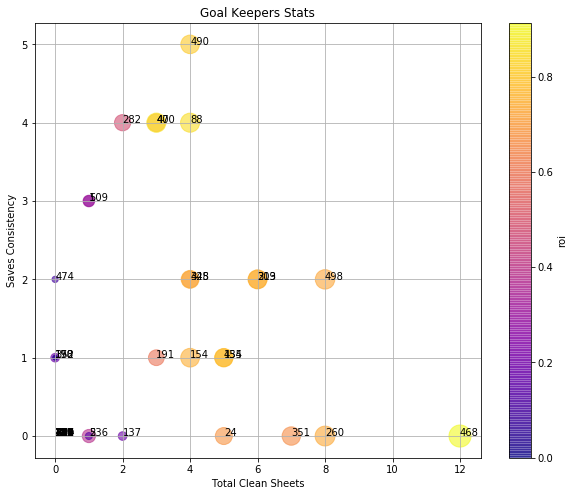

In [37]:
def save_consistensy(saves):
    return sum(saves > 5)
goalkeeperids = list(cleaned_players.loc[cleaned_players['element_type'] == 1, 'player_id'])
goalkeepers = players.loc[[ player_id in goalkeeperids for player_id in players['player_id']], :]

gk_stats_by_player_id = goalkeepers.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'clean_sheets' : np.sum,
    'saves' : base_aggregations + [save_consistensy],
    'roi' : np.mean,
    'value' : np.mean,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
})

plt.figure(figsize=(10, 8))

x = gk_stats_by_player_id['clean_sheets']['sum']
y = gk_stats_by_player_id['saves']['save_consistensy']
colors = gk_stats_by_player_id['roi']['mean']
sizes = gk_stats_by_player_id['points']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=sizes * 5, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Total Clean Sheets")
plt.ylabel("Saves Consistency")
cbar.ax.set_ylabel("roi")
plt.title("Goal Keepers Stats")
plt.grid(True)

for index, row in gk_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
    
plt.show()

In [50]:
ids = [468, 490, 498, 88, 260]
names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
104,490,Joe,Hart,4,90,1,0,0,69,1710,41,10.1,586.2,0.0,7,378,59.5,4,0,0,8.8,45,JoeHart
110,88,Neil,Etheridge,5,97,1,0,0,73,1710,38,0.0,594.6,0.0,8,381,59.3,4,0,1,5.4,45,NeilEtheridge
163,498,Kepa,Arrizabalaga,6,8,1,0,0,76,1710,16,0.1,321.2,0.0,3,355,31.9,8,0,1,5.8,56,KepaArrizabalaga
332,468,Alisson,Ramses Becker,12,14,1,0,0,98,1710,7,0.0,365.2,0.0,5,411,36.4,12,0,0,23.8,59,AlissonRamses Becker
337,260,Ederson,Santana de Moraes,13,43,1,0,1,79,1710,15,23.0,296.0,0.0,4,326,31.9,8,0,1,23.9,57,EdersonSantana de Moraes


## The Crossers

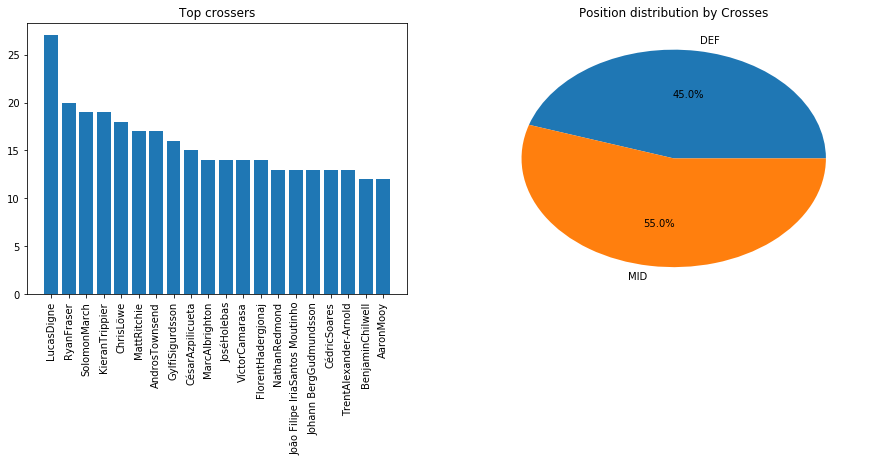

In [49]:
crossers = players.groupby('player_id', as_index=False)['open_play_crosses'].sum()

crossers = crossers.merge(cleaned_players.loc[:, ['player_id', 'fullname', 'element_type','team']], on='player_id')

#merge with elemen_types
crossers = pd.merge(crossers, element_types.loc[:, ['id', 'singular_name_short']], left_on='element_type', right_on='id')
crossers.drop(columns=['id', 'element_type'], inplace=True)
crossers.rename(columns={'singular_name_short': 'position'}, inplace=True)

#merge with teams
crossers = pd.merge(crossers, teams.loc[:, ['id', 'name']], left_on='team', right_on='id')
crossers.drop(columns=['id', 'team'], inplace=True)
crossers.rename(columns={'name':'team'}, inplace=True)

top = crossers.sort_values('open_play_crosses', ascending=False)[:20]

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.bar(top['fullname'], top['open_play_crosses'])
plt.xticks(rotation=90)
plt.title("Top crossers")

n_def, n_mid = top.loc[top['position'] == 'DEF', :].shape[0],top.loc[top['position'] == 'MID', :].shape[0]

plt.subplot(122)
plt.pie([n_def, n_mid], labels=['DEF', 'MID'], autopct='%1.1f%%')
plt.title("Position distribution by Crosses")
plt.show()


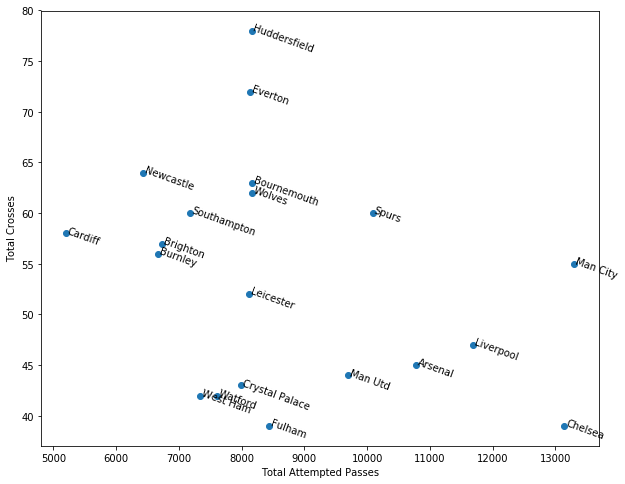

In [39]:
passers = players.groupby('player_id', as_index=False)['attempted_passes'].sum()
crossers = crossers.merge(passers, on='player_id')
crosses_by_team = crossers.groupby('team', as_index=False).agg({
    'open_play_crosses' : np.sum,
    'attempted_passes' : np.sum
})

top_crosses_team = crosses_by_team.sort_values('open_play_crosses', ascending=False)
plt.figure(figsize=(10, 8))
x = top_crosses_team['attempted_passes']
y = top_crosses_team['open_play_crosses']
plt.scatter(x, y)
plt.xlabel('Total Attempted Passes')
plt.ylabel('Total Crosses')

for index, row in top_crosses_team.iterrows():
    plt.gca().annotate(row['team'], (x[index], y[index]), rotation=-20)
    
plt.show()

## The Error Makers

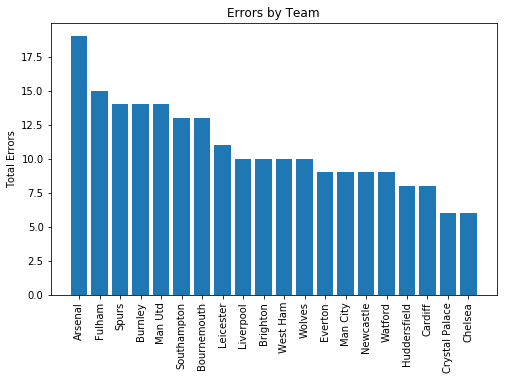

In [40]:
players_stats = players.groupby('player_id', as_index=False).agg({
    'own_goals' : np.sum,
    'errors_leading_to_goal' : np.sum,
    'errors_leading_to_goal_attempt' : np.sum
})
players_stats = pd.merge(players_stats, cleaned_players.loc[:, ['player_id', 'fullname', 'element_type', 'team']], on='player_id')

players_stats = pd.merge(players_stats, element_types.loc[:, ['id', 'singular_name_short']], left_on='element_type', right_on='id')
players_stats.drop(columns=['element_type', 'id'], inplace=True)
players_stats.rename(columns={'singular_name_short':'position'}, inplace=True)

players_stats = pd.merge(players_stats, teams.loc[:, ['id','name']], left_on='team', right_on='id')
players_stats.drop(columns=['team','id'], inplace=True)
players_stats.rename(columns={'name': 'team'}, inplace=True)

players_stats['errors'] = players_stats['own_goals'] + players_stats['errors_leading_to_goal'] + players_stats['errors_leading_to_goal_attempt']

error_makers_by_team = players_stats.groupby('team', as_index=False)['errors'].sum().sort_values('errors', ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(error_makers_by_team['team'], error_makers_by_team['errors'])
plt.xticks(rotation=90)
plt.ylabel('Total Errors')
plt.title('Errors by Team')
plt.show()


## Correlations between Bonus and other features

In [41]:
df = pd.merge(players, cleaned_players.loc[:, ['player_id', 'element_type', 'team']], on='player_id')
df = pd.merge(df, element_types.loc[:, ['id', 'singular_name_short']], left_on='element_type', right_on='id')
df.drop(columns=['element_type', 'id_y','id_x'], inplace=True)
df.rename(columns={'singular_name_short': 'position'}, inplace=True)

df = pd.merge(df, teams.loc[:, ['id', 'name']], left_on='team', right_on='id')
df.drop(columns=['id', 'team'], inplace=True)
df.rename(columns={'name':'team'}, inplace=True)
columns_to_drop = ['gw', 'player_id', 'fixture', 'kickoff_time','kickoff_time_formatted','selected','team_a_score', 'team_h_score', 'position', 'team', 'opponent_team']

attackers = df.loc[df['position'] == 'FWD',:].drop(columns=columns_to_drop)

bonus_corr = attackers.corr()['bonus']
bonus_corr = bonus_corr[np.abs(bonus_corr) > 0.2].sort_values(ascending=False)

print("Forwards Bonus correlation")
bonus_corr


Forwards Bonus correlation


bonus                              1.000000
points                             0.831270
bps                                0.829981
goals_scored                       0.820189
influence                          0.808176
roi                                0.783396
ict_index                          0.634042
winning_goals                      0.553464
threat                             0.486423
minutes                            0.341580
attempted_passes                   0.336803
completed_passes                   0.331699
recoveries                         0.309051
creativity                         0.288883
value                              0.264880
key_passes                         0.257192
assists                            0.247746
tackles                            0.246852
clearances_blocks_interceptions    0.240179
target_missed                      0.214062
Name: bonus, dtype: float64

<span style='color:green'>Surprisingly, target_missed has positive correlation with bonus?</span><br>
<span style='color:green'>Maybe the more they miss targets means the more opportunities they try, and that results in the more bonus he got</span>

In [42]:
attackers = df.loc[df['position'] == 'MID',:].drop(columns=columns_to_drop)

bonus_corr = attackers.corr()['bonus']
bonus_corr = bonus_corr[np.abs(bonus_corr) > 0.2].sort_values(ascending=False)

print("Midfielders Bonus correlation")
bonus_corr

Midfielders Bonus correlation


bonus                  1.000000
points                 0.774620
roi                    0.731346
goals_scored           0.725564
influence              0.690627
bps                    0.684405
ict_index              0.549452
winning_goals          0.459414
threat                 0.398297
assists                0.325971
creativity             0.315386
big_chances_created    0.297491
key_passes             0.296126
minutes                0.256999
attempted_passes       0.254748
completed_passes       0.250544
dribbles               0.241589
value                  0.212950
recoveries             0.209038
Name: bonus, dtype: float64

<span style='color:green'>Kind of same as Forwards</span>

In [43]:
attackers = df.loc[df['position'] == 'DEF',:].drop(columns=columns_to_drop)

bonus_corr = attackers.corr()['bonus']
bonus_corr = bonus_corr[np.abs(bonus_corr) > 0.2].sort_values(ascending=False)

print("Defenders Bonus correlation")
bonus_corr

Defenders Bonus correlation


bonus                              1.000000
points                             0.716497
roi                                0.705631
bps                                0.553412
influence                          0.463242
ict_index                          0.451229
clean_sheets                       0.433312
assists                            0.382923
goals_scored                       0.367400
winning_goals                      0.335340
attempted_passes                   0.287876
threat                             0.287811
completed_passes                   0.284149
minutes                            0.264058
creativity                         0.263758
tackles                            0.262740
key_passes                         0.259259
recoveries                         0.255462
clearances_blocks_interceptions    0.241839
big_chances_created                0.241318
Name: bonus, dtype: float64

## Influence, Creativity and Threat analysis
 source: https://www.premierleague.com/news/65567

#### 1. Influence

Influence is the first measurement. This evaluates the degree to which that player has made an impact on a single match or throughout the season.

It takes into account events and actions that could directly or indirectly effect the outcome of the fixture.

At the top level these are decisive actions like goals and assists. But the Influence score also processes significant defensive actions to analyse the effectiveness of defenders and goalkeepers.


#### 2. Creativity
Creativity assesses player performance in terms of producing goalscoring opportunities for others. It can be used as a guide to identify the players most likely to supply assists.

While this analyses frequency of passing and crossing, it also considers pitch location and quality of the final ball.


#### 3. Threat
This is the third measure, producing a value that examines a player's threat on goal. It gauges individuals most likely to score goals.

While attempts are the key action, the Index looks at pitch location, giving greater weight to actions that are regarded as the best chances to score.

All three of these scores are combined to create an overall ICT Index score. That then offers a single figure that presents a view on that player as an FPL asset

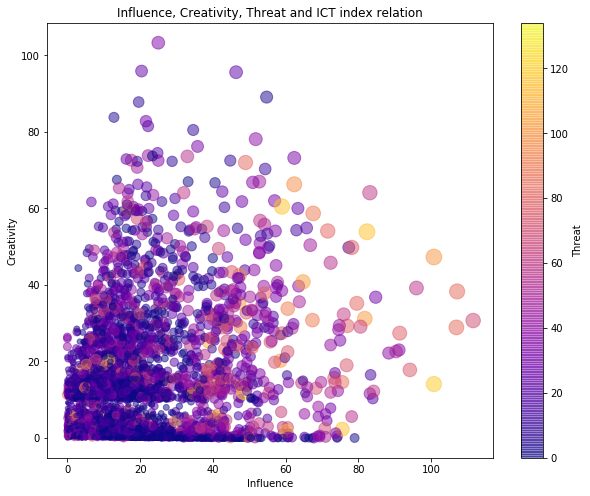

In [44]:
x = players['influence']
y = players['creativity']
colors = players['threat']
sizes = players['ict_index']

plt.figure(figsize=(10,8))
plt.scatter(x, y, c=colors, cmap='plasma', s=sizes*10, alpha=0.5)
cbar = plt.colorbar()
plt.title("Influence, Creativity, Threat and ICT index relation")
plt.xlabel("Influence")
plt.ylabel("Creativity")
cbar.ax.set_ylabel("Threat")
plt.show()

In [45]:
attributes = ['influence', 'creativity', 'threat', 'ict_index']
df = players[attributes]
corr_mx = df.corr()
corr_mx

,influence,creativity,threat,ict_index
influence,1.000000,0.487230,0.527447,0.836820
creativity,0.487230,1.000000,0.461234,0.767963
threat,0.527447,0.461234,1.000000,0.831693
ict_index,0.836820,0.767963,0.831693,1.000000


/Users/80151/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


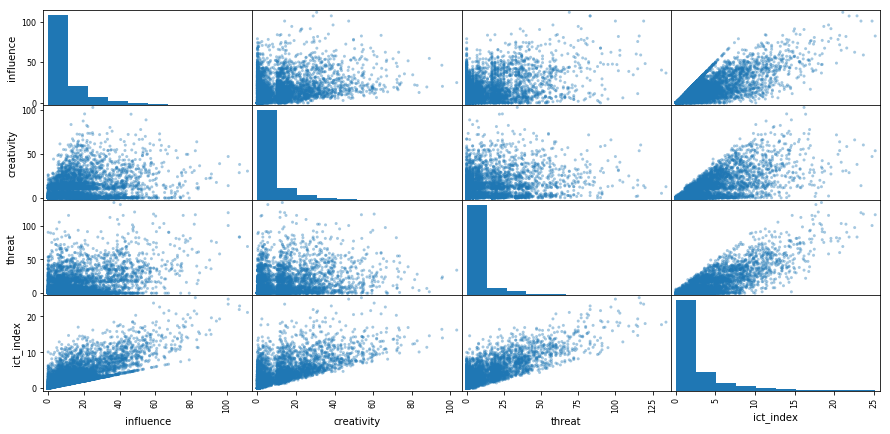

In [46]:
scatter_matrix(df, figsize=(15, 7), alpha=0.4)
plt.show()

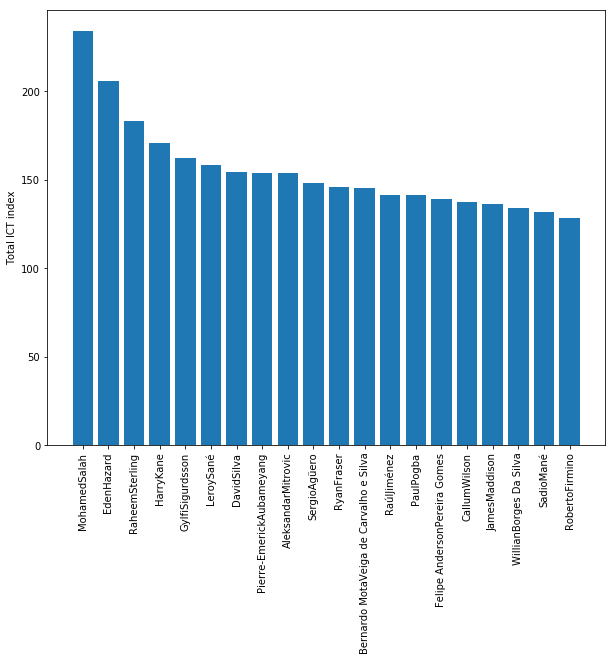

In [47]:
df = players.groupby('player_id', as_index=False).agg({
    'ict_index': np.sum,
    'bps': np.sum,
    'bonus' : np.sum
})
df = df.merge(cleaned_players.loc[:, ['player_id', 'fullname']], on='player_id')
top_by_ict = df.sort_values('ict_index', ascending=False)[:20]

plt.figure(figsize=(10, 8))
plt.bar(top_by_ict['fullname'], top_by_ict['ict_index'])
plt.xticks(rotation=90)
plt.ylabel('Total ICT index')
plt.show()

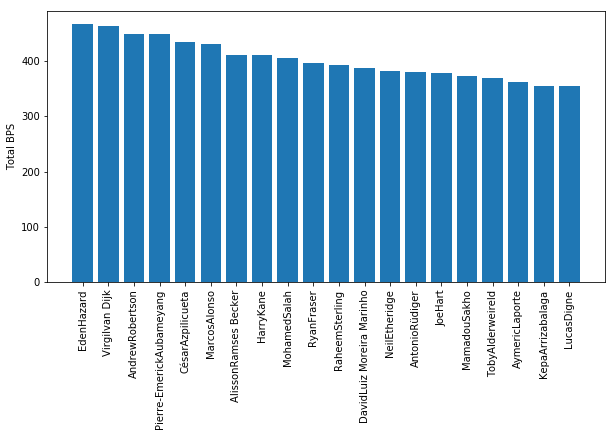

In [48]:
top_by_bps = df.sort_values('bps', ascending=False)[:20]
bps = top_by_bps['bps']
bonus = top_by_bps['bonus']

plt.figure(figsize=(10, 5))
plt.bar(top_by_bps['fullname'], top_by_bps['bps'])
plt.xticks(rotation=90)
plt.ylabel('Total BPS')
plt.show()